## Importing the libraries and data

In [254]:
!pip install seaborn

In [255]:
# Importing Liabraries
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [256]:
# Reading Trainning and Testing data sets
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

# Removing (NaN) values from the trainning data frame
train_data = train_data.dropna(axis=0)

train_data

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...,...,...
2054,2054,V. Sasi,CHIRAYINKEEZHU,CPI,1,61 Lac+,10 Lac+,KERALA,Graduate Professional
2055,2055,Pushkar Lal Dangi,MAVLI,INC,0,2 Crore+,8 Lac+,RAJASTHAN,10th Pass
2056,2056,Dr. Manju Shiwach,MODI NAGAR,BJP,0,13 Crore+,85 Lac+,UTTAR PRADESH,Graduate
2057,2057,Mansing Fattesingrao Naik,SHIRALA,NCP,1,25 Crore+,94 Lac+,MAHARASHTRA,12th Pass


## Converting Train Data Set in Required Format



In [257]:
# Create an instance of LabelEncoder to encode categorical labels
label_encoder = LabelEncoder()

#Encode categorical labels in the 'Education' column using LabelEncoder
y_encoded = label_encoder.fit_transform(train_data['Education'])

#Convert the encoded labels to a 1-dimensional array using NumPy's ravel function
y = y_encoded.reshape(-1)

In [258]:
# Testing Features used in prediction
train_features = ['Party', 'Criminal Case', 'Liabilities', 'state']

# Creating dataframe X containning train features columns from train_data
X = train_data[train_features]

X

,Party,Criminal Case,Liabilities,state
0,DMK,4,2 Crore+,TAMIL NADU
1,BJP,0,0,MADHYA PRADESH
2,INC,0,22 Lac+,KARNATAKA
3,BJP,0,24 Lac+,BIHAR
4,BJP,2,61 Lac+,WEST BENGAL
...,...,...,...,...
2054,CPI,1,10 Lac+,KERALA
2055,INC,0,8 Lac+,RAJASTHAN
2056,BJP,0,85 Lac+,UTTAR PRADESH
2057,NCP,1,94 Lac+,MAHARASHTRA


In [259]:
# List of columns to be encoded
columns_to_encode = ['Party', 'state']

# Dictionary to store label encoders for each column
label_encoders = {}

# Loop through columns to encode and create encoded columns in the DataFrame
for col in columns_to_encode:

    # Create a LabelEncoder instance for the column
    label_encoders[col] = LabelEncoder()

    # Encode the column values and store in a new column with suffix '_encoded'
    train_data[col + '_encoded'] = label_encoders[col].fit_transform(train_data[col])

# List of newly created encoded columns
X_encoded_columns = [col + '_encoded' for col in columns_to_encode]

# List of columns other than the encoded columns
X_other_columns = [col for col in train_features if col not in columns_to_encode]

# Create the final feature dataframe X by combining encoded and other columns
X = train_data[X_other_columns + X_encoded_columns]

X

,Criminal Case,Liabilities,Party_encoded,state_encoded
0,4,2 Crore+,7,23
1,0,0,4,13
2,0,22 Lac+,8,11
3,0,24 Lac+,4,3
4,2,61 Lac+,4,27
...,...,...,...,...
2054,1,10 Lac+,5,12
2055,0,8 Lac+,8,21
2056,0,85 Lac+,4,25
2057,1,94 Lac+,13,14


In [260]:
# Function to convert All liability data to crores
def convert_to_crores(value_str):
    if 'Crore' in value_str:
        value = float(value_str.split()[0])
    elif 'Lac' in value_str:
        value = float(value_str.split()[0]) / 100
    elif 'Thou' in value_str:
        value = float(value_str.split()[0]) / 10000
    else:
        value = 0
    return value
# Liabilities in "Crores"
X['Liabilities (Crores)'] = X['Liabilities'].apply(convert_to_crores)

# dropping Liabilities original column
X.drop(['Liabilities'], axis=1, inplace=True)

In [261]:
# Splitting dataset
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 1)

## Train Data Visualisation

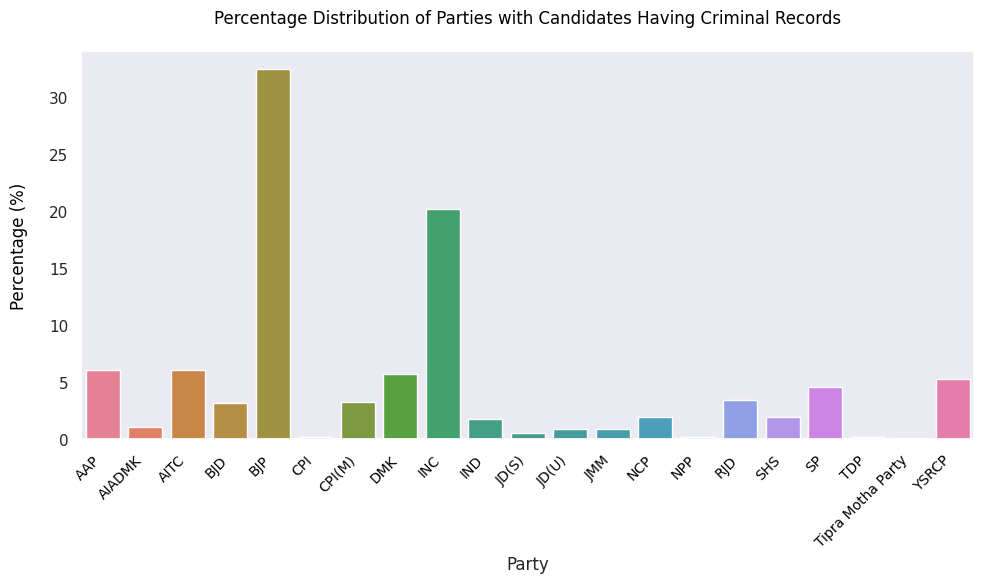

In [262]:
# Obtaining Candidates Counts with atleast one criminal case for each Party
party_criminal_counts = train_data[train_data['Criminal Case']>0].groupby('Party').size()

# calculating criminal counts percentage
party_percentage = (party_criminal_counts / party_criminal_counts.sum()) * 100

# converting into dataframe
party_percentage_df = party_percentage.reset_index(name='Percentage')

sns.set(style="darkgrid")

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
plot=sns.barplot(x='Party', y='Percentage', data=party_percentage_df, palette='husl')
plot.set_title('Percentage Distribution of Parties with Candidates Having Criminal Records', fontsize=12, color='black', pad=20)
plt.xlabel('Party')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='black')
plot.set_ylabel('Percentage (%)', fontsize=12, color='black', labelpad=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

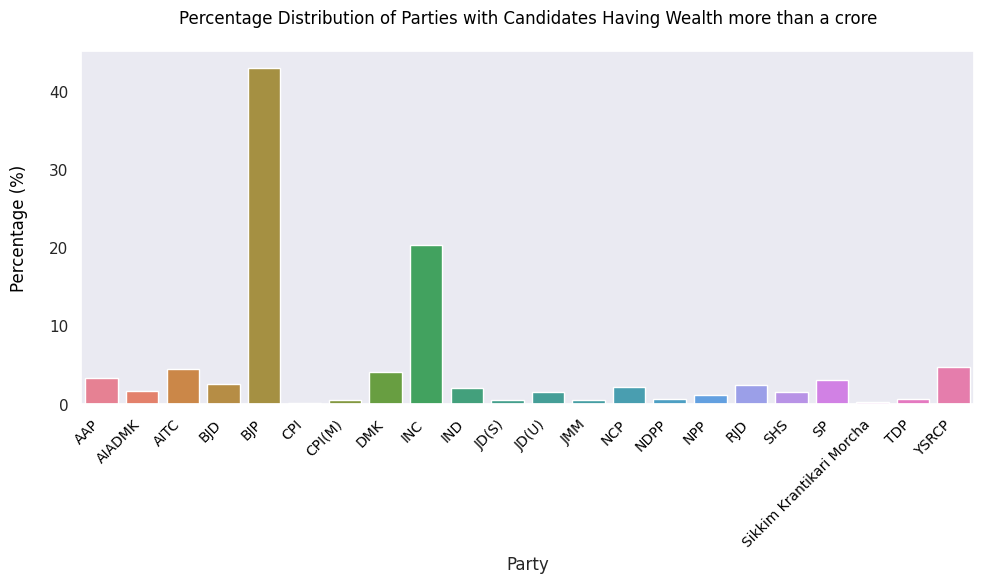

In [263]:
# Converting assets and liabilites to crores
train_data['Assets (Crores)'] = train_data['Total Assets'].apply(convert_to_crores)
train_data['Liabilities (Crores)'] = train_data['Liabilities'].apply(convert_to_crores)

# Calculating Wealth
train_data['Wealth'] = train_data['Assets (Crores)'] - train_data['Liabilities (Crores)']

# Finding candidates having wealth more than a crore for each party
party_wealth_counts = train_data[train_data['Wealth'] > 1].groupby('Party').size()

# Converting into Percentage
party_percentage = (party_wealth_counts / party_wealth_counts.sum()) * 100

party_percentage_df = party_percentage.reset_index(name='Percentage')

sns.set(style="darkgrid")

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
plot=sns.barplot(x='Party', y='Percentage', data=party_percentage_df, palette='husl')
plot.set_title('Percentage Distribution of Parties with Candidates Having Wealth more than a crore', fontsize=12, color='black', pad=20)
plt.xlabel('Party')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, ha='right', fontsize=10, color='black')
plot.set_ylabel('Percentage (%)', fontsize=12, color='black', labelpad=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

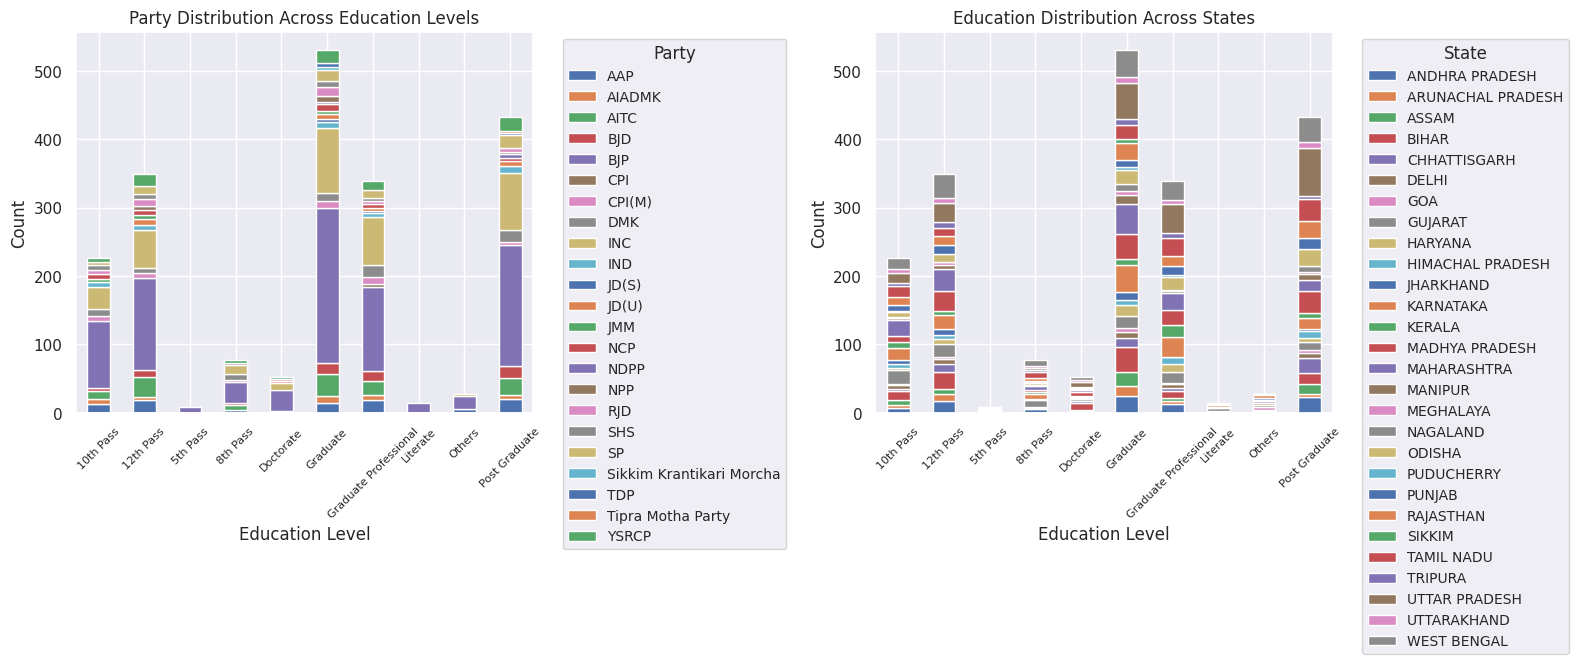

In [264]:
#Plotting two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Parties distribution across different education level
party_education_count = train_data.groupby(['Education', 'Party']).size().unstack()

# Plotting party distribution across education levels
party_education_count.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Party Distribution Across Education Levels')
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45, labelsize=8)

# Customizing the legend for the first subplot
legend_labels = party_education_count.columns.tolist()
ax1.legend(labels=legend_labels, title='Party', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Education distribution across states
state_education_count = train_data.groupby(['Education', 'state']).size().unstack()
state_education_count.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Education Distribution Across States')
ax2.set_xlabel('Education Level')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45, labelsize=8)

# Customizing the legend for the second subplot
state_legend_labels = state_education_count.columns.tolist()
ax2.legend(labels=state_legend_labels, title='State', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

## K-nearest neighbour Model Training

In [265]:
# Create a KNN model with 11 nearest neighbors
election_model = KNeighborsClassifier(n_neighbors=11, metric = "euclidean", weights= "uniform")

# Train the model on the training data
election_model.fit(train_X, train_y)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [266]:
# Predicting on train split dataset
election_split_preds = election_model.predict(val_X)

# Calculating f1 score
f1 = f1_score(val_y, election_split_preds, average='weighted')

print("F1 Score :", f1)

F1 Score : 0.20495796706185662


## Converting Test Data Set in Required Format

In [267]:
# Similar process as above for converting test data in model input format

test_features = ['Party', 'Criminal Case', 'Liabilities', 'state']

X_test = test_data[test_features]

columns_to_encode = ['Party', 'state']

label_encoders = {}

for col in columns_to_encode:
    label_encoders[col] = LabelEncoder()
    test_data[col + '_encoded'] = label_encoders[col].fit_transform(test_data[col])

X_encoded_columns = [col + '_encoded' for col in columns_to_encode]
X_other_columns = [col for col in test_features if col not in columns_to_encode]

X_test = test_data[X_other_columns + X_encoded_columns]

# Liabilities in "Crores"
X_test['Liabilities (Crores)'] = X_test['Liabilities'].apply(convert_to_crores)

X_test.drop(['Liabilities'], axis=1, inplace=True)

X_test

,Criminal Case,Party_encoded,state_encoded,Liabilities (Crores)
0,2,9,14,11.00
1,1,2,27,0.13
2,3,13,14,1.00
3,1,2,27,0.00
4,0,18,25,2.00
...,...,...,...,...
1369,0,4,27,0.00
1370,1,3,18,0.13
1371,1,8,3,0.00
1372,1,4,9,0.05


## Prediction and Generating Submission CSV

In [268]:
# Predicting education label on testing dataset
labeled_education =election_model.predict(X_test)

# Inverse transform the education labels
predicted_education = label_encoder.inverse_transform(labeled_education)

In [269]:
data = {
    'ID': range(len(predicted_education)),
    'Education': predicted_education
}

# Create predicted dataframe
submission_df = pd.DataFrame(data)

for i, candidate_name in enumerate(test_data['Candidate']):

    # Modifying as Adv. can be only Graduate Professional
    if candidate_name.startswith("Adv."):
        submission_df.loc[i, 'Education'] = "Graduate Professional"

    # Modifying as Dr. can't be "5th Pass" , "8th Pass" , "10th Pass", "12th Pass", "literate" and "other"
    elif candidate_name.startswith("Dr."):
        current_education = submission_df.loc[i, 'Education']
        valid_educations = ['Graduate Professional', 'Graduate', 'Post Graduate', 'Doctorate']
        if current_education not in valid_educations:
            submission_df.loc[i, 'Education'] = "Doctorate"

# Setting ID as index
submission_df.set_index('ID', inplace=True)

# Saving final submission as "submission.csv"
submission_df.to_csv('submission.csv')

submission_df

,Education
ID,
0,Graduate Professional
1,12th Pass
2,12th Pass
3,12th Pass
4,Post Graduate
...,...
1369,Graduate Professional
1370,Graduate
1371,Graduate
